# 랜덤 포레스트 Random Forest
## 0. 소개
- 강력한 앙상블 학습 방법 중 하나
- 여러 개의 결정 트리를 사용해 예측 성능을 향상시키는 알고리즘

## 1. 개념
### 1.1 결정 트리 Decision Tree
- 결정 트리는 데이터의 특성을 기반으로 의사 결정을 내리는 트리 구조 모델
- 분류Classification와 회귀Regression 모두에 사용 가능
- 각 노드는 하나의 특성을 기준으로 데이터 분할
### 1.2 앙상블 학습 Ensemble Learning
- 여러 개의 모델을 결합하여 더 나의 성능을 얻는 방법
- 랜덤 포레스트는 앙상블 학습의 일종
- 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘
### 1.3 랜덤 포레스트 Random Forest
- 여러 개의 결정 트리를 만들어, 각 트리의 예측을 회귀의 경우 평균, 분류의 경우 다수결 투표로 결합하는 방법
    1. 부트스트랩 샘플링 Bootstrap Sampling
        - 원본 데이터에서 중복을 허용하여 여러 개의 샘플 데이터를 생성
    2. 랜덤 특성 선택 Random Feature Selection
        - 각 트리의 노드를 분할할 때, 임의로 선택된 일부 특성만 고려
- 각 결정 트리의 예측을 사용해 최종 예측을 만듦
- 각 노드를 분할할 때 전체 특성 중 일부 특성을 무작위로 골라 최선의 분할을 찾음
    - RandomForestClassifier는 전체 특성 개수의 제곱근 만큼 특성 선택, 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측
    - RandomForestRegressor는 전체 특성을 사용, 각 트리의 단순 예측을 평균

## 2. 장단점
### 장점
- 여러 트리를 결합하여 예측 성능을 향상시킴
- 랜덤 특성 선택과 부트스트랩 샘플링을 통해 과적합 방지
- 분류, 회귀 모두 사용 가능
### 단점
- 개별 결정 트리는 해석이 쉽지만, 여러 트리를 결합한 랜덤 포레스트는 해석이 어려움
- 많은 트리를 학습하고 예측하는 데 시간이 오래 걸림

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine  =  pd.read_csv('https://bit.ly/wine-date')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

### RandomForestClassifier
- 기본적으로 100개의 결정 트리 사용
- n_jobs = -1 : 최대한 병렬로 교차 검증 수행
- reuturn_train_score = True : 검증 세트의 점수와 훈련 세트의 점수를 비교하여 과적합 파악

### 교차 검증 cross-vaildation
- 모델의 성능을 평가하기 위해 데이터를 여러 번 나누어 학습, 검증
- 단순히 훈련 데이터, 테스트 데이터로 한 번 나누어 평가하는 것 보다 더 신뢰할 수 있는 성능 평가 제공

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


- 훈련 데이터 과대적합 같음

- 'alcohol', 'sugar', 'pH' 순서의 특성 중요도 알아보기
- 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것

In [4]:
rf.fit(train_input, train_target)
rf.feature_importances_

array([0.23167441, 0.50039841, 0.26792718])

### 결정 트리의 특성 중요도와 다름
- 03_Decision_Tree_impoertances

    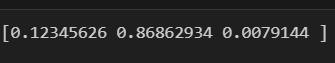
- 랜덤 포레스트가 특성의 일부를 랜덤 선택하여 결정 트리를 훈련하기 때문
- 그 결과 한 특성에 과하게 집중하지 않고, 좀 더 다양한 특성이 훈련에 기역
- 과적합을 줄이고 일반화 성능을 높임

### RandomForestClassifier의 다른 기능
- 분류 모델은 훈련 데이터에서 중복을 혀용 (부트스트랩 샘플)
- 부트스트랩 샘플에 속하지 않은 샘플(OOB;Out Of Bag 샘플)을 이용해 부트스랩 샘플로 훈련한 결정 트리를 평가
- oob_score = True로 설정
    - 랜덤 포레스트는 각 결정 트리의 OOB 점수 평균을 출력
- 교차 검증을 대신해 더 많은 샘플을 훈련 데이터로 사용

In [5]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
rf.oob_score_

0.8934000384837406

## 엑스트라 트리 Extra Tree
- 랜덤 포레스트와 비슷
    - 기본적으로 100개의 결정 트리 훈련
    - 결정 트리의 매개변수 대부분을 지원
    - 일정 특성을 랜덤 선택하여 노드 분할
### 차이점
- 부트스트랩 샘플 사용 안함
    - 결정 트리를 만들 때 전체 훈련 데이터 사용
- 노드 분할 시, 무작위 분할
    - 성능 감소
    - 많은 트리를 앙상블 하기 때문에 과대적합 방지
    - 검증 데이터의 점수를 높이는 효과
- splitter = 'random'인 결정 트리

In [6]:
# 엑스트라 트리 분류 버전
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


### 랜덤 포레스트와 비슷한 결과

- 데이터의 특성이 많지 않기 때문
- 보통 엑스트라 트리가 무작위성이 더 크기 때문에 램덤 포레스트보다 더 많은 결정 트리를 훈련해야 함
### 엑스트라 트리의 장점
- 노드를 랜덤 분할하기 때문에 빠른 계산 속도


In [7]:
et.fit(train_input, train_target)
et.feature_importances_
# 엑스트라 트리 분류의 특성 중요도
# 'alcohol', 'sugar', 'pH' 순서

array([0.20183568, 0.52242907, 0.27573525])

# 앙상블 학습
- 강력하고 뛰어난 성능
- 사이킷런에서 랜덤 포레스트, 엑스트라 트리, 그레이디언트 부스팅, 히스토그램 기반 그레이디언트 부스팅 제공
### 랜덤 포레스트
- 가장 대표적인 앙상블 학습 알고리즘
- 성능이 좋고 안정적
- 결정 트리를 훈련하기 위해 부트스트랩 샘플을 만들고 전체 특성 중 일부 랜덤 선택하여 결정 트리 만듬
### 엑스트라 트리
- 랜덤 포레스트와 비슷하지만 부트스트랩 샘플 사용 안함
    - 노드를 분할할때 가장 좋은 분할이 아니라 랜덤 분할
- 훈련 속도가 빠르지만, 보통 더 많은 트리가 필요
### 그레이디언트 부스팅
- 깊이가 얕은 트리를 연속 추가하여 손실 함수를 최소화하는 앙상블 학습
- 성능이 뛰어남
- 병렬로 훈련할 수 없음
    - 랜덤 포레스트나 엑스트라 트리보다 훈련 속도가 느림
- 학습률 매개변수를 이용해 모델의 복잡도 제어
    - 학습률 매개변수가 크면 복잡하고 훈련 데이터에 과대적합된 결과 모델을 얻을 수 있음